## Observations and Insights 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mergedDF = pd.merge(mouse_metadata, study_results, how='left', on="Mouse ID")

# Display the data table for preview
mergedDF.head(5)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
no_of_mice = len(mouse_metadata['Mouse ID'])
no_of_mice

249

In [5]:
# # Test to confirm mouse id is duplicate
# study_results.loc[study_results['Mouse ID'] == 'g989'] 

In [6]:
# # Mytests
# # Drop duplicated mouse iD Time point
# cleaned_study_resultsDF = study_results.drop_duplicates(['Mouse ID', 'Timepoint'])

In [7]:
# study_results.loc[study_results['Mouse ID'] == 'g989']

In [8]:
# # Mytests
# cleaned_study_resultsDF.loc[study_results['Mouse ID'] == 'g989']

In [9]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# We can see Mouse ID g989 is duplicated for timepoints shownbelow:
study_results.loc[study_results.duplicated(['Mouse ID', 'Timepoint'])]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
137,g989,0,45.000000,0
360,g989,5,47.570392,0
681,g989,10,49.880528,0
869,g989,15,53.442020,0
1111,g989,20,54.657650,1


In [10]:
# Optional: Get all the data for the duplicate mouse ID. 
mergedDF.loc[mergedDF['Mouse ID'] == 'g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# We have the Mouse ID as g989
# Set DF index to Mouse ID
# Drop Index of Duplicated Mouse by ID
# Reset DF index
Mouse_ID = 'g989'
indexedDF = mergedDF.set_index('Mouse ID')
indexedDF.drop(index=Mouse_ID, inplace=True)

In [12]:
# # Mytests
# indexedDF

In [13]:
cleanData = indexedDF.reset_index()

In [14]:
# Checking the number of mice in the clean DataFrame.
no_of_mice = len(cleanData['Mouse ID'].unique())
f'{no_of_mice} mice'

'248 mice'

In [15]:
# cleanData.head(4)

In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# plt.hist(cleanData['Tumor Volume (mm3)'])
# plt.xlabel('Tumor Volume (mm3)')
# plt.ylabel('Counts')
# plt.show()

# print(f"Mean is: {cleanData['Tumor Volume (mm3)'].mean()}")
# print(f"Median is: {cleanData['Tumor Volume (mm3)'].median()}")


In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.


## Summary Statistics

In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 


cleanData_mean = cleanData.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
cleanData_median = cleanData.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
cleanData_var = cleanData.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var(ddof=1)
cleanData_std = cleanData.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std(ddof=1)
cleanData_sem = cleanData.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem(ddof=1)


In [19]:
# Assemble the resulting series into a single summary dataframe.
# create DF dictionary
data = {
    'mean': cleanData_mean,
    'median': cleanData_median,
    'variance': cleanData_var,
    'std_dev': cleanData_std,
    'sem': cleanData_sem
}
summary_df = pd.concat(data, axis = 1)

# call Dataframe
summary_df

,mean,median,variance,std_dev,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
                                        

# pd.DataFrame(cleanData.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean())


In [21]:
# Trying single line code
stats = {
'cleanData_mean': cleanData.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean(),
'cleanData_median': cleanData.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median(),
'cleanData_var': cleanData.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var(ddof=1),
'cleanData_std': cleanData.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std(ddof=1),
'cleanData_sem': cleanData.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem(ddof=1)
}

pd.DataFrame(stats)

,cleanData_mean,cleanData_median,cleanData_var,cleanData_std,cleanData_sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

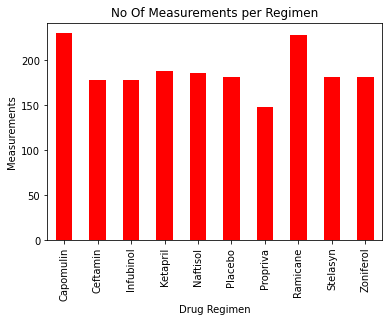

In [22]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
# Using Pandas

# Total no of measurements taken per Drug Regimen is: 
total_no = cleanData.groupby(['Drug Regimen']).count()['Tumor Volume (mm3)']

# Plot using Pandas plot

total_no.plot(kind="bar", facecolor="red")
# plt.tight_layout()


# Set labels and title chart
plt.title("No Of Measurements per Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Measurements")
plt.show()


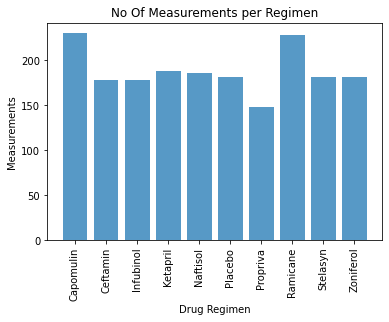

<Figure size 720x360 with 0 Axes>

In [23]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

# Get x and y axis
x_axis = total_no.index
y_axis = total_no


# tick locations:
tick_locations = []
for x in x_axis:
    tick_locations.append(x)


    
# label and title chart
plt.title("No Of Measurements per Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Measurements")


# plt.xticks(tick_locations, DF, rotation="vertical"
plt.bar(x_axis, y_axis, alpha=0.75, align="center")
plt.xticks(tick_locations, x_axis, rotation="vertical")
plt.figure(figsize=(10,5))
plt.show()


In [24]:
# Drop duplicated Mouse ID and create DF:
sex_data = cleanData.drop_duplicates(['Mouse ID'])

# create series of sex count
series_sex_data = sex_data.value_counts(['Sex'])


# Make DF
sex_data_DF = pd.DataFrame(series_sex_data, columns=['Count of sex'])
sex_data_DF

,Count of sex
Sex,
Male,125
Female,123


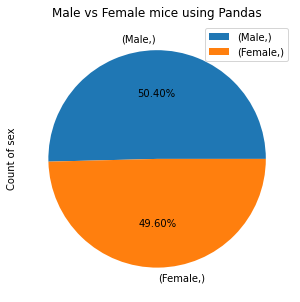

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Plot pie plot
plot = sex_data_DF.plot.pie(y='Count of sex', figsize=(5, 5), autopct="%1.2f%%")


# Set labels and title chart
plt.title("Male vs Female mice using Pandas")
plt.show()

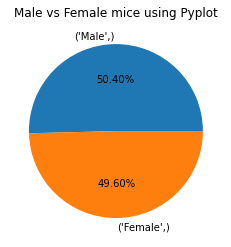

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sexData = series_sex_data
labels = ["Male", "Female"]

labels2 = series_sex_data.index


pyplot_chart = plt.pie(sexData, labels=labels2, autopct="%1.2f%%")

plt.title("Male vs Female mice using Pyplot")
plt.show()

## Quartiles, Outliers and Boxplots

In [27]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
final_vol = cleanData.groupby(['Mouse ID']).max()

drug_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create a list to hold the tumor vol data for each Regimen
tumor_DF = []

for i in drug_regimens:
    tumor_DF.append(final_vol.loc[final_vol['Drug Regimen'] == i, ['Drug Regimen', 'Tumor Volume (mm3)', 'Timepoint']])

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


# tumor_DF[0].head(2)



In [28]:
Capomulin_Data = pd.DataFrame(tumor_DF[0])
Ramicane_Data = pd.DataFrame(tumor_DF[1])
Infubinol_Data = pd.DataFrame(tumor_DF[2])
Ceftamin_Data = pd.DataFrame(tumor_DF[3])


In [29]:
# Concat list of Dataframes into 1 DFrame
mergedFinalData = pd.concat(tumor_DF)
mergedFinalData.head(3)

,Drug Regimen,Tumor Volume (mm3),Timepoint
Mouse ID,,,
b128,Capomulin,45.651331,45
b742,Capomulin,45.000000,45
f966,Capomulin,45.000000,20


In [30]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
tumor_vols = mergedFinalData['Tumor Volume (mm3)']
quartiles = tumor_vols.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor_vols is: {lowerq}")
print(f"The upper quartile of tumor_vols is: {upperq}")
print(f"The interquartile range of tumor_vols is: {iqr}")
print(f"The the median of tumor_vols is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

The lower quartile of tumor_vols is: 45.5098442875
The upper quartile of tumor_vols is: 59.930261755000004
The interquartile range of tumor_vols is: 14.420417467500002
The the median of tumor_vols is: 46.860058175 
Values below 23.87921808625 could be outliers.
Values above 81.56088795625001 could be outliers.


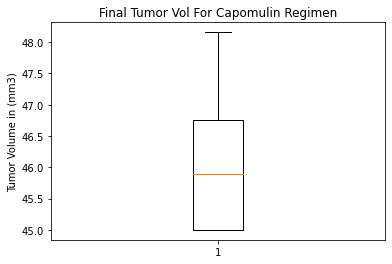

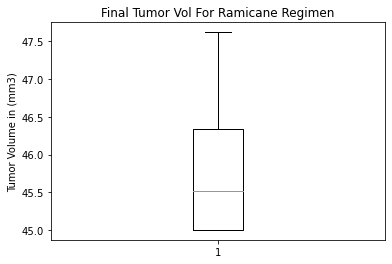

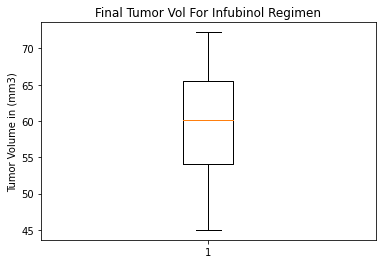

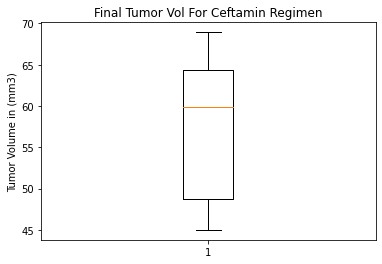

In [31]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Capomulin_vols = [i for i in mergedFinalData.loc[mergedFinalData['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']]
Ramicane_vols = [i for i in mergedFinalData.loc[mergedFinalData['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']]
Infubinol_vols = [i for i in mergedFinalData.loc[mergedFinalData['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']]
Ceftamin_vols = [i for i in mergedFinalData.loc[mergedFinalData['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']]
fig1, ax1 = plt.subplots()
fig1, ax2 = plt.subplots()
fig1, ax3 = plt.subplots()
fig1, ax4 = plt.subplots()
ax1.set_title('Final Tumor Vol For Capomulin Regimen')
ax2.set_title('Final Tumor Vol For Ramicane Regimen')
ax3.set_title('Final Tumor Vol For Infubinol Regimen')
ax4.set_title('Final Tumor Vol For Ceftamin Regimen')
ax1.set_ylabel('Tumor Volume in (mm3)')
ax2.set_ylabel('Tumor Volume in (mm3)')
ax3.set_ylabel('Tumor Volume in (mm3)')
ax4.set_ylabel('Tumor Volume in (mm3)')
ax1.boxplot(Capomulin_vols)
ax2.boxplot(Ramicane_vols)
ax3.boxplot(Infubinol_vols)
ax4.boxplot(Ceftamin_vols)
plt.show()

In [32]:
Capomulin_Data.loc['b128']
# Capomulin_Data

Drug Regimen          Capomulin
Tumor Volume (mm3)      45.6513
Timepoint                    45
Name: b128, dtype: object

## Line and Scatter Plots

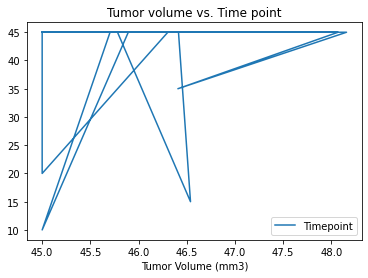

In [33]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_Data
Capomulin_Data.plot.line(x='Tumor Volume (mm3)', y='Timepoint')
plt.title("Tumor volume vs. Time point")
plt.show()

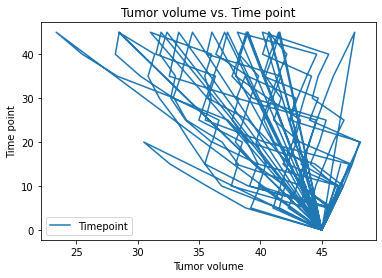

In [34]:
capomulin_plots = cleanData.loc[cleanData['Drug Regimen'] == 'Capomulin', ['Mouse ID','Weight (g)', 'Timepoint', 'Tumor Volume (mm3)']]
capomulin_plots.head(3)
capomulin_plots.plot.line(x='Tumor Volume (mm3)', y='Timepoint')
plt.title("Tumor volume vs. Time point")
plt.xlabel("Tumor volume")
plt.ylabel("Time point")
plt.show()

From the above plot, in some instances, tumor vol actually increased before declining with time. 

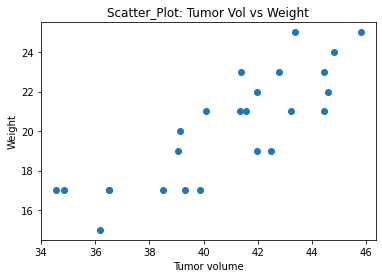

In [35]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mean_data = capomulin_plots.groupby(['Mouse ID']).mean()
plt.scatter(mean_data['Tumor Volume (mm3)'], mean_data['Weight (g)'])
plt.title("Scatter_Plot: Tumor Vol vs Weight")
plt.xlabel("Tumor volume")
plt.ylabel("Weight")
plt.show()

## Correlation and Regression

In [36]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

weight = mean_data.iloc[:, 0]
ave_tumor_vol = mean_data.iloc[:, 2]
correlation = st.pearsonr(ave_tumor_vol, weight)
print(f'The correlation factor between ave weight and tumor vol is {round(correlation[0], 2)}')

The correlation factor between ave weight and tumor vol is 0.84


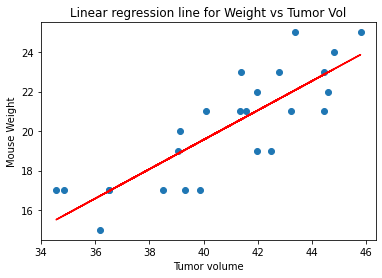

In [37]:
x_values = ave_tumor_vol
y_values = weight
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# plt.annotate(line_eq,(0,0),fontsize=5,color="red")
plt.xlabel('Tumor volume')
plt.ylabel('Mouse Weight')
plt.title("Linear regression line for Weight vs Tumor Vol")
plt.show()


From above, we see there is a clear correlation between weight and tumor volume in Mice. Correlation factor is 0.8 and the graph is a straight line, supporting that result tending to 1.